In [1]:
import pandas as pd
df = pd.read_csv("Car details v3.csv")
df 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
pip install xgboost



   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/72.0 MB 1.9 MB/s eta 0:00:38
   ---------------------------------------- 0.2/72.0 MB 2.1 MB/s eta 0:00:35
   ---------------------------------------- 0.4/72.0 MB 2.5 MB/s eta 0:00:29
   ---------------------------------------- 0.6/72.0 MB 3.3 MB/s eta 0:00:22
    --------------------------------------- 1.0/72.0 MB 4.1 MB/s eta 0:00:18
    --------------------------------------- 1.2/72.0 MB 4.0 MB/s eta 0:00:18
    --------------------------------------- 1.5/72.0 MB 4.3 MB/s eta 0:00:17
    --------------------------------------- 1.8/72.0 MB 4.5 MB/s eta 0:00:16
   - -------------------------------------- 1.9/72.0 MB 4.4 MB/s eta 0:00:16
   - -------------------------------------- 2.2/72.0 MB 4.4 MB/s eta 0:00:16
   - -------------------------------------- 2.5/72.0 MB 4.6 MB/s eta 0:00:16
   - -------------------------------------- 2.8/72.0 MB 4.8 MB/s eta 0:00:15
   - 

In [7]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7345,Mahindra Xylo D4,2018,650000,114000,Diesel,Individual,Manual,First Owner,14.95 kmpl,2489 CC,93.7 bhp,218Nm@ 1400-2600rpm,7.0
2725,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6002,Skoda Rapid 1.6 TDI Elegance,2012,425000,90000,Diesel,Individual,Manual,First Owner,20.5 kmpl,1598 CC,103.5 bhp,250Nm@ 1500-2500rpm,5.0
2403,Honda Brio V MT,2012,310000,50000,Petrol,Individual,Manual,Second Owner,19.4 kmpl,1198 CC,86.8 bhp,109Nm@ 4500rpm,5.0
6711,Tata Manza Aura (ABS) Safire,2010,140000,116700,Petrol,Individual,Manual,Fourth & Above Owner,15.0 kmpl,1368 CC,90 bhp,116Nm@ 4750rpm,5.0
7953,Ford Ecosport 1.5 Diesel Titanium,2014,550000,105000,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0
3727,Hyundai Elite i20 Diesel Sportz,2019,700000,60000,Diesel,Individual,Manual,First Owner,22.54 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
1096,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
227,Tata Zest Revotron 1.2 XT,2018,520000,60000,Petrol,Individual,Manual,First Owner,17.57 kmpl,1193 CC,88.7 bhp,140Nm@ 1500-4000rpm,5.0
360,Tata Indigo CS eGLX BS IV,2011,150000,50000,Petrol,Individual,Manual,Second Owner,15.64 kmpl,1193 CC,64.08 bhp,100Nm@ 2700rpm,5.0


In [8]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 8128
Number of Columns : 13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
df.describe(exclude=np.number)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [13]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})


,Count,Null,Null %,Cardinality
name,8128,0,0.000000,2058
year,8128,0,0.000000,29
selling_price,8128,0,0.000000,677
km_driven,8128,0,0.000000,921
fuel,8128,0,0.000000,4
seller_type,8128,0,0.000000,3
transmission,8128,0,0.000000,2
owner,8128,0,0.000000,5
mileage,8128,221,2.718996,393
engine,8128,221,2.718996,121


In [14]:
df.dropna(inplace=True , ignore_index=True)

In [15]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
261,Mahindra Thar CRDe,2017,780000,35000,Diesel,Individual,Manual,First Owner,16.55 kmpl,2498 CC,105 bhp,247Nm@ 1800-2000rpm,6.0
2759,Maruti Ritz VXI,2010,320000,60000,Petrol,Individual,Manual,Second Owner,21.1 kmpl,1197 CC,85.80 bhp,114Nm@ 4000rpm,5.0
1594,Hyundai Grand i10 CRDi Asta Option,2013,270000,118000,Diesel,Individual,Manual,First Owner,24.0 kmpl,1120 CC,70 bhp,160Nm@ 1500-2750rpm,5.0
7435,Tata Indica Vista TDI LX,2014,280000,100000,Diesel,Individual,Manual,First Owner,19.1 kmpl,1405 CC,70 bhp,135.4Nm@ 2500rpm,5.0
801,Hyundai Verna 1.6 CRDi S,2017,850000,35000,Diesel,Individual,Manual,First Owner,23.9 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
3346,Maruti Ertiga VDI,2015,650000,100000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
4876,Maruti Zen LXI,2002,55000,100000,Petrol,Individual,Manual,Second Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0
108,Hyundai Verna 1.6 SX,2013,522000,150000,Diesel,Individual,Manual,Second Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
7425,Maruti Ertiga VXI,2012,560000,59000,Petrol,Individual,Manual,First Owner,16.02 kmpl,1373 CC,93.7 bhp,130Nm@ 4000rpm,7.0
5281,Mahindra XUV300 W8 Option Diesel BSIV,2019,1200000,25000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1497 CC,115 bhp,300Nm@ 1500-2500rpm,5.0


In [16]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 7906
Number of Columns : 13


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


In [18]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [19]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [20]:
df.describe(exclude=np.number)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,7906,7906,7906,7906,7906,7906,7906,7906,7906
unique,1982,4,3,2,5,393,121,320,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4299,6563,6865,5215,225,1017,377,530


In [21]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
name,7906,0,0.0,1982
year,7906,0,0.0,27
selling_price,7906,0,0.0,670
km_driven,7906,0,0.0,898
fuel,7906,0,0.0,4
seller_type,7906,0,0.0,3
transmission,7906,0,0.0,2
owner,7906,0,0.0,5
mileage,7906,0,0.0,393
engine,7906,0,0.0,121


In [22]:
Brands_of_car = df['name'].tolist()
for i in range(len(Brands_of_car)):
    car = Brands_of_car[i].split(' ')
    Brands_of_car[i] = car[0]
Brands_of_car = pd.Series(Brands_of_car)

In [23]:
df['name'] = Brands_of_car

In [24]:
print(f"Number of Unique Brand of Car {df['name'].nunique()}")

Number of Unique Brand of Car 31


In [25]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
Count_of_Brands_Car = df['name'].value_counts()[:20]
fig = px.bar(Count_of_Brands_Car,
       title = 'Top 20 Brands of Car',
       template = 'plotly_dark',
       color = Count_of_Brands_Car,
       labels={'value':'Number of Frequency in Data','name':'Brand of Car'},
       text_auto=True
       )
fig.show(renderer='iframe')


In [26]:
brand_production_per_Year = df.groupby('year')['name']

In [27]:
print(f"Number of Cars Production in 2020 only '{len(brand_production_per_Year.get_group(2020))}'")

Number of Cars Production in 2020 only '74'


In [28]:
last_five_years = list(df['year'].value_counts().sort_index(ascending=False)[1:6].index)
last_five_years.sort()

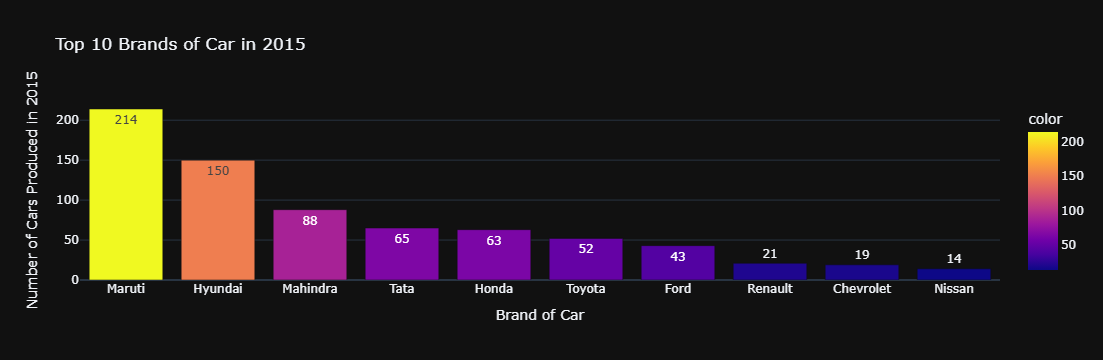

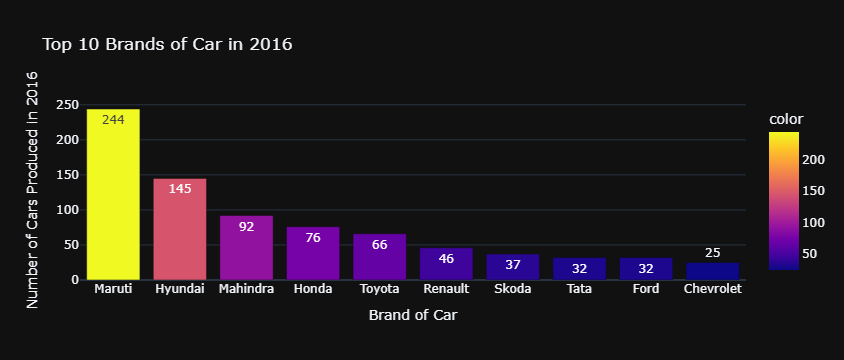

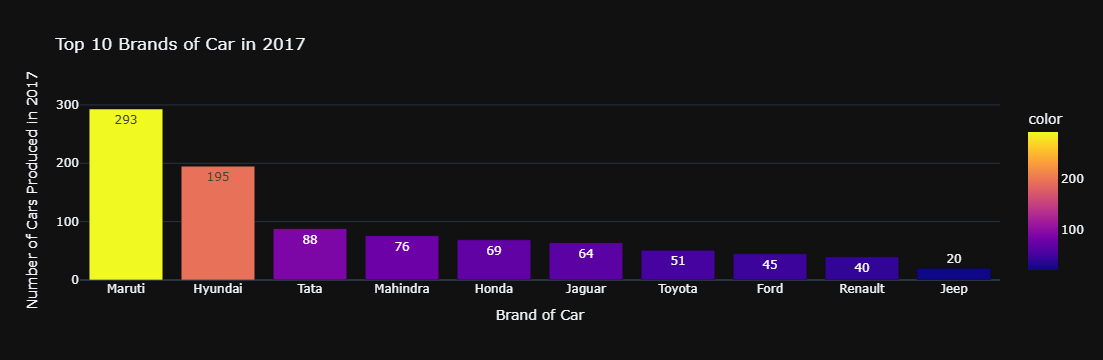

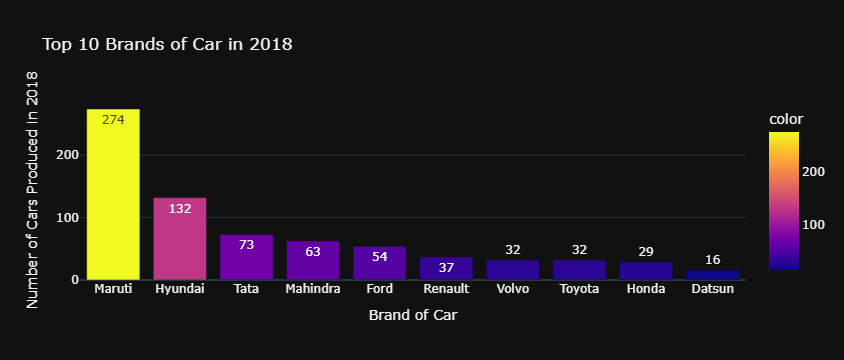

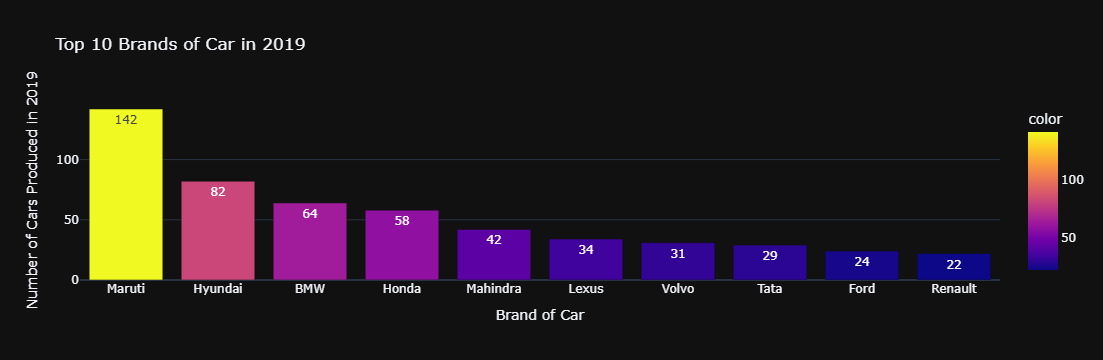

In [29]:
for year in last_five_years:
  iplot(px.bar(brand_production_per_Year.get_group(year).value_counts()[:10],
       title = f'Top 10 Brands of Car in {year}',
       template = 'plotly_dark',
       color = brand_production_per_Year.get_group(year).value_counts()[:10],
       labels={'value':f'Number of Cars Produced in {year}','name':'Brand of Car'},
       text_auto=True
       ))

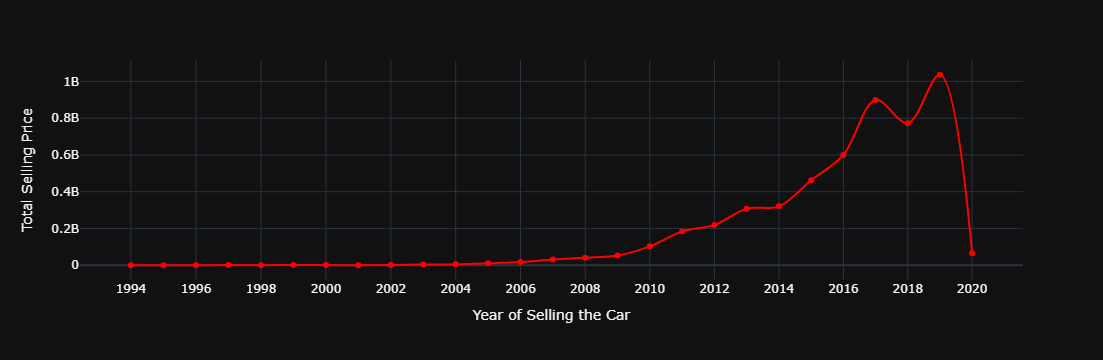

In [30]:
sum_Price_Years = df.groupby('year')['selling_price'].sum()
px.line(sum_Price_Years,
        x = sum_Price_Years.index,
        y = sum_Price_Years.values,
        labels={'y':'Total Selling Price','year':'Year of Selling the Car'},
        template = 'plotly_dark',
        markers = True,
        line_shape = 'spline',
        color_discrete_sequence = ['red'],
        log_x = True)

In [31]:
print(f"Best year for total car sales profit in the Market in '{sum_Price_Years.idxmax()}' is ${sum_Price_Years.values.max():,.2f}")

Best year for total car sales profit in the Market in '2019' is $1,035,982,984.00


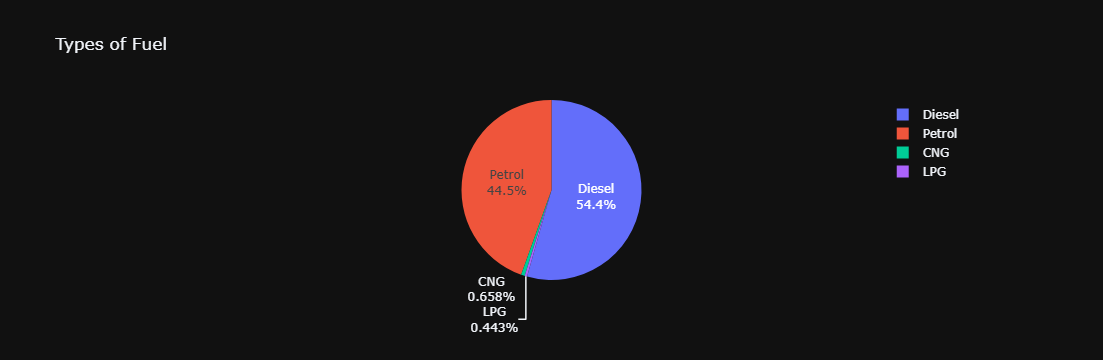

In [32]:
type_of_fuel = df['fuel'].value_counts()
px.pie(title='Types of Fuel',
       values = type_of_fuel.values,
       names = type_of_fuel.index,
       template = 'plotly_dark'
       ).update_traces(textinfo='label+percent')

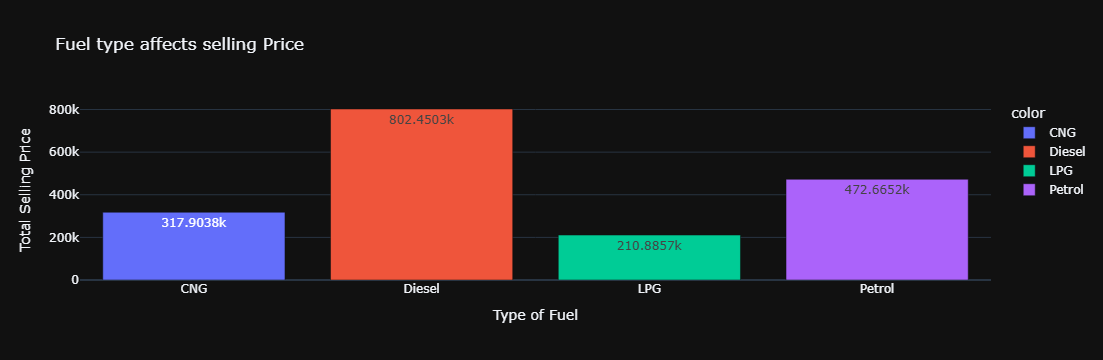

In [33]:
price_Type_Fuel = df.groupby('fuel')['selling_price'].mean()
px.bar(x = price_Type_Fuel.index,
       y = price_Type_Fuel.values,
       template = 'plotly_dark',
       color = price_Type_Fuel.index,
       text_auto = True,
       title = 'Fuel type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Fuel'}
       )

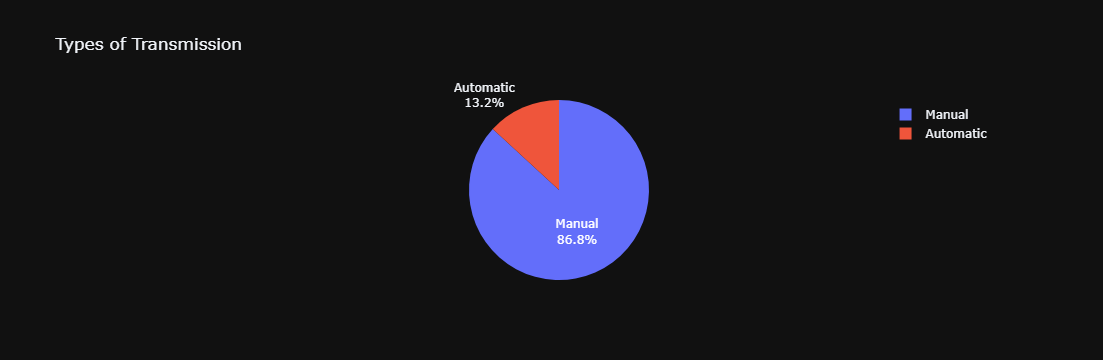

In [34]:
type_transmission = df['transmission'].value_counts()
px.pie(title='Types of Transmission',
       values = type_transmission.values,
       names = type_transmission.index,
       template = 'plotly_dark'
       ).update_traces(textinfo='label+percent')

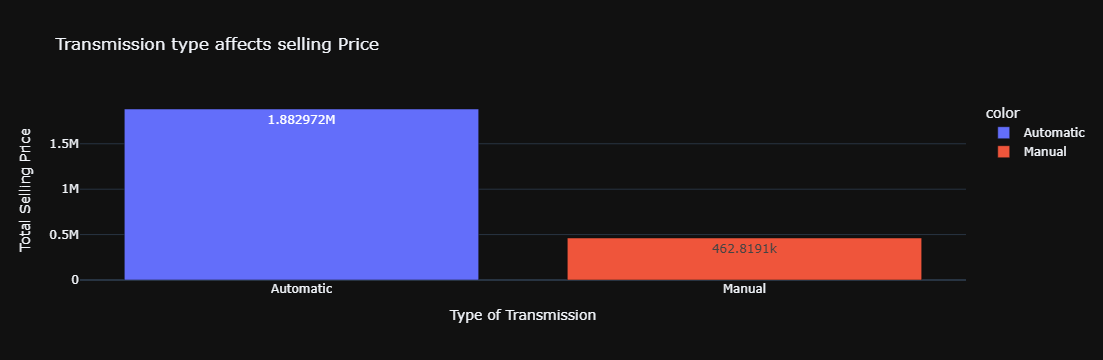

In [35]:
Selling_price_transmission = df.groupby('transmission')['selling_price'].mean()
px.bar(x = Selling_price_transmission.index,
       y = Selling_price_transmission.values,
       template = 'plotly_dark',
       color = Selling_price_transmission.index,
       text_auto = True,
       title = 'Transmission type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Transmission'}
       )

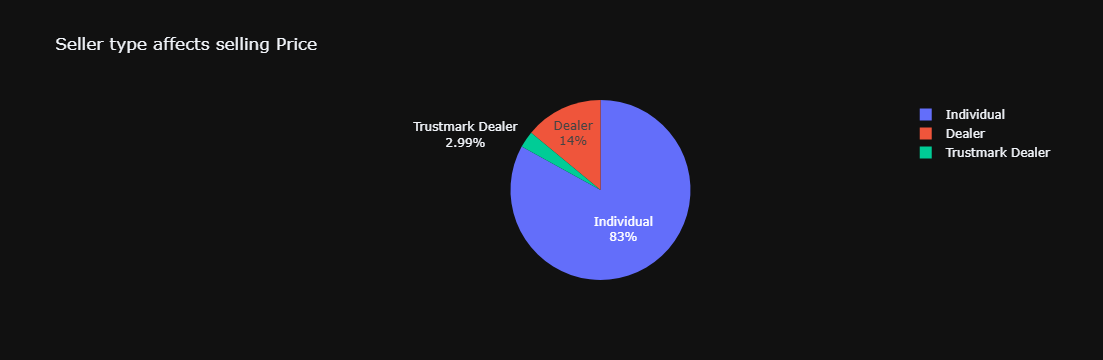

In [36]:
seller_types = df['seller_type'].value_counts()
px.pie(title = 'Seller type affects selling Price',
       values = seller_types.values,
       names = seller_types.index,
       template = 'plotly_dark'
       ).update_traces(textinfo='label+percent')

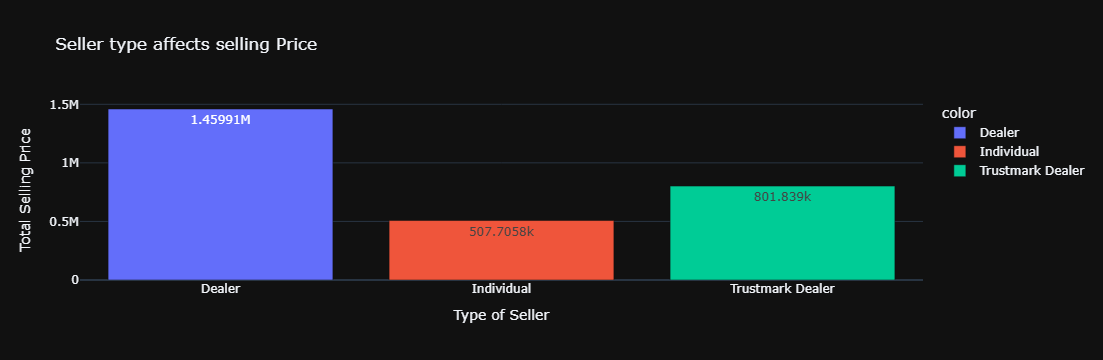

In [37]:
Selling_price_seller_types = df.groupby('seller_type')['selling_price'].mean()
px.bar(x = Selling_price_seller_types.index,
       y = Selling_price_seller_types.values,
       template = 'plotly_dark',
       color = Selling_price_seller_types.index,
       text_auto = True,
       title = 'Seller type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Seller'}
       )

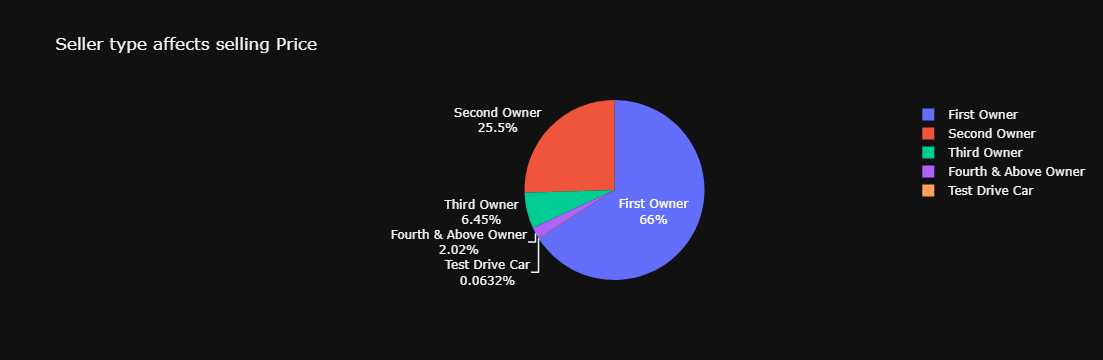

In [38]:
owner_types = df['owner'].value_counts()
px.pie(title = 'Seller type affects selling Price',
       values = owner_types.values,
       names = owner_types.index,
       template = 'plotly_dark'
       ).update_traces(textinfo='label+percent')

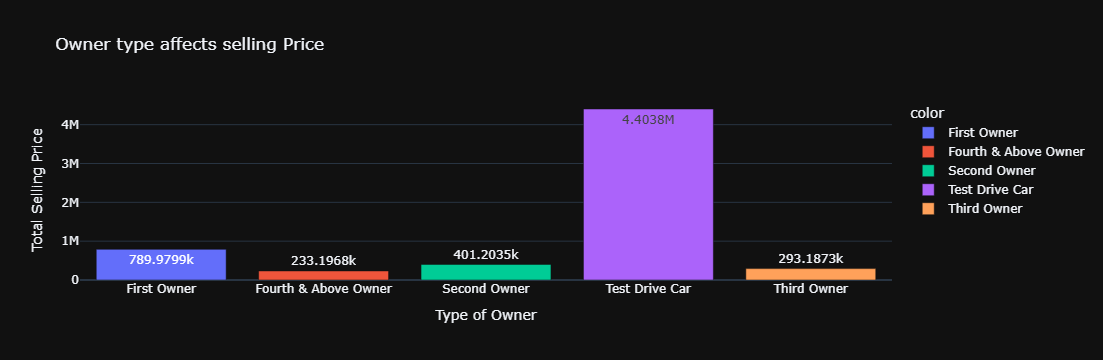

In [39]:
Selling_price_owner_types = df.groupby('owner')['selling_price'].mean()
px.bar(x = Selling_price_owner_types.index,
       y = Selling_price_owner_types.values,
       template = 'plotly_dark',
       color = Selling_price_owner_types.index,
       text_auto = True,
       title = 'Owner type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Owner'}
       )

In [40]:
df = df.replace({'mileage':'[A-Za-z/]','engine':'[A-Za-z]','max_power':'[A-Za-z]'},'',regex=True)
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [41]:
df.drop('torque' , axis = 1 , inplace = True)

In [42]:
df['year'] = 2025 - df['year']
df.rename(columns={'year':'age'},inplace=True)
df.head()

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   age            7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 741.3+ KB


In [44]:
column_to_encode = ['name','fuel','seller_type','transmission','owner']
le = LabelEncoder()
for column in column_to_encode:
    df[column] = le.fit_transform(df[column])
df.head()

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,11,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,26,11,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,10,19,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,11,15,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,20,18,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   int32  
 1   age            7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int32  
 5   seller_type    7906 non-null   int32  
 6   transmission   7906 non-null   int32  
 7   owner          7906 non-null   int32  
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(4), int32(5), int64(3)
memory usage: 586.9 KB


In [46]:
X = df.drop('selling_price' , axis = 1)
y = df['selling_price']

In [48]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (5929, 11)
Shape of X_Test (1977, 11)
Shape of Y_Train (5929,)
Shape of Y_Test (1977,)


In [49]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model,model_name):
    score = r2_score(y_test , model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

In [50]:
lr = LinearRegression()
Kfold(lr,'Linear Regression')
train(lr,'Linear Regression')
r2(lr,'Linear Regression')

Linear Regression score on cross validation: 66.00283903822259%
Linear Regression model score on Training data: 67.61174801974936%
Linear Regression model score on Testing data: 68.83581706676091%
R2 Score for Linear Regression is 68.83581706676091%


In [51]:
rf_model = RandomForestRegressor(n_estimators = 100 , max_depth = 10)
Kfold(rf_model, "Random Forest")
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest score on cross validation: 96.25739393945241%
Random Forest model score on Training data: 98.81786086562643%
Random Forest model score on Testing data: 97.05351080213626%
R2 Score for Random Forest is 97.05351080213626%


In [52]:
bag = BaggingRegressor(n_estimators= 10)
Kfold(bag,'Bagging')
train(bag,'Bagging')
r2(bag,'Bagging')

Bagging score on cross validation: 96.2545439169392%
Bagging model score on Training data: 99.24883579018811%
Bagging model score on Testing data: 97.29872141479873%
R2 Score for Bagging is 97.29872141479873%


In [53]:
GrBoost = GradientBoostingRegressor()
Kfold(GrBoost,'Gradient Boosting')
train(GrBoost,'Gradient Boosting')
r2(GrBoost,'Gradient Boosting')

Gradient Boosting score on cross validation: 95.44791777139451%
Gradient Boosting model score on Training data: 97.45946904753747%
Gradient Boosting model score on Testing data: 96.33850098030655%
R2 Score for Gradient Boosting is 96.33850098030655%


In [54]:
knn = KNeighborsRegressor()
Kfold(knn,'KNN')
train(knn,'KNN')
r2(knn,'KNN')

KNN score on cross validation: 79.96173785489884%
KNN model score on Training data: 86.79608828404307%
KNN model score on Testing data: 82.55109300514209%
R2 Score for KNN is 82.55109300514209%


In [55]:
DTR = DecisionTreeRegressor()
Kfold(DTR,'Decision Tree')
train(DTR,'Decision Tree')
r2(DTR,'Decision Tree')

Decision Tree score on cross validation: 94.78326172728757%
Decision Tree model score on Training data: 99.9662127253933%
Decision Tree model score on Testing data: 95.81041330387148%
R2 Score for Decision Tree is 95.81041330387148%


In [56]:
xgboost = XGBRegressor()
Kfold(xgboost, "XGBoost")
train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost score on cross validation: 96.26465590866546%
XGBoost model score on Training data: 99.61505280210022%
XGBoost model score on Testing data: 97.41086015985965%
R2 Score for XGBoost is 97.41086015985965%


In [57]:
joblib.dump(xgboost,'XGBoost.sav')

['XGBoost.sav']

In [3]:
!streamlit run car project.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io


In [2]:
!pip install streamlit

In [ ]:
!streamlit run car.py
